# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
# import NYC restaurant inspections data and assign to variable
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,05/06/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,05/06/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,05/06/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,05/06/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,05/06/2019,Cycle Inspection / Initial Inspection


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383300 entries, 0 to 383299
Data columns (total 18 columns):
CAMIS                    383300 non-null int64
DBA                      382759 non-null object
BORO                     383300 non-null object
BUILDING                 383071 non-null object
STREET                   383297 non-null object
ZIPCODE                  377777 non-null float64
PHONE                    383282 non-null object
CUISINE DESCRIPTION      383300 non-null object
INSPECTION DATE          383300 non-null object
ACTION                   382032 non-null object
VIOLATION CODE           377576 non-null object
VIOLATION DESCRIPTION    374811 non-null object
CRITICAL FLAG            383300 non-null object
SCORE                    365258 non-null float64
GRADE                    193019 non-null object
GRADE DATE               190720 non-null object
RECORD DATE              383300 non-null object
INSPECTION TYPE          382032 non-null object
dtypes: float64(2), int6

# Data Cleaning

In [5]:
# look at number of null values
df.isnull().sum()

CAMIS                         0
DBA                         541
BORO                          0
BUILDING                    229
STREET                        3
ZIPCODE                    5523
PHONE                        18
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1268
VIOLATION CODE             5724
VIOLATION DESCRIPTION      8489
CRITICAL FLAG                 0
SCORE                     18042
GRADE                    190281
GRADE DATE               192580
RECORD DATE                   0
INSPECTION TYPE            1268
dtype: int64

Text(0.5, 1.0, 'Missing Data')

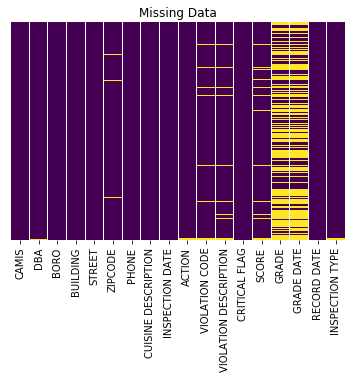

In [6]:
# visualize null values in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [112]:
# look at null values under Score
df_sub = df.groupby(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE', 'INSPECTION DATE']).agg({
        'CUISINE DESCRIPTION': 'first',
        'ACTION': 'unique',
        'VIOLATION CODE': 'nunique',
        'VIOLATION DESCRIPTION': 'nunique',
        'CRITICAL FLAG': 'nunique',
        'SCORE': 'mean',
        'GRADE': 'unique',
        'GRADE DATE': 'unique',
        'RECORD DATE': 'unique',
        'INSPECTION TYPE': 'unique'
}).reset_index()

In [113]:
df_sub.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,INSPECTION DATE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,02/18/2016,Bakery,[Violations were cited in the following area(s).],2,2,2,10.0,[A],[02/18/2016],[05/06/2019],[Cycle Inspection / Initial Inspection]
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,05/11/2018,Bakery,[Violations were cited in the following area(s).],2,2,1,5.0,[A],[05/11/2018],[05/06/2019],[Cycle Inspection / Initial Inspection]
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,05/18/2017,Bakery,[Violations were cited in the following area(s).],2,2,2,7.0,[A],[05/18/2017],[05/06/2019],[Cycle Inspection / Initial Inspection]
3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,03/04/2019,Hamburgers,[Violations were cited in the following area(s).],3,3,2,13.0,[A],[03/04/2019],[05/06/2019],[Cycle Inspection / Initial Inspection]
4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,03/13/2018,Hamburgers,[Violations were cited in the following area(s).],3,3,2,12.0,[A],[03/13/2018],[05/06/2019],[Cycle Inspection / Initial Inspection]


In [114]:
df_sub.isnull().sum()

CAMIS                       0
DBA                         0
BORO                        0
BUILDING                    0
STREET                      0
ZIPCODE                     0
PHONE                       0
INSPECTION DATE             0
CUISINE DESCRIPTION         0
ACTION                      0
VIOLATION CODE              0
VIOLATION DESCRIPTION       0
CRITICAL FLAG               0
SCORE                    2583
GRADE                       0
GRADE DATE                  0
RECORD DATE                 0
INSPECTION TYPE             0
dtype: int64

In [103]:
# look at value counts of Record Date - all the same values
df['RECORD DATE'].value_counts()

05/06/2019    382032
Name: RECORD DATE, dtype: int64

In [8]:
# look at value counts of Inspection Type
df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          224242
Cycle Inspection / Re-inspection                                90118
Pre-permit (Operational) / Initial Inspection                   27018
Pre-permit (Operational) / Re-inspection                        11723
Administrative Miscellaneous / Initial Inspection                6999
Cycle Inspection / Reopening Inspection                          4249
Pre-permit (Non-operational) / Initial Inspection                3467
Smoke-Free Air Act / Initial Inspection                          2795
Administrative Miscellaneous / Re-inspection                     2097
Trans Fat / Initial Inspection                                   1909
Pre-permit (Operational) / Compliance Inspection                 1155
Calorie Posting / Initial Inspection                             1143
Pre-permit (Operational) / Reopening Inspection                   992
Inter-Agency Task Force / Initial Inspection                      980
Cycle Inspection / C

In [9]:
# look at the unique values of the Grade column
df['GRADE'].unique()

array(['A', nan, 'B', 'C', 'P', 'Z', 'Not Yet Graded', 'G'], dtype=object)

In [10]:
# look at the data points where Grade is null - most are of new restaurants (indicated by inspection date = 1/1/1900 per data documentation)
df[df.GRADE.isnull() == True]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
14,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,06/26/2017,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,7.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
17,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/03/2016,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,48.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
18,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/03/2016,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,48.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
19,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/03/2016,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,48.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
20,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/03/2016,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,48.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
21,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,10/03/2016,Violations were cited in the following area(s).,10A,Toilet facility not maintained and provided wi...,Not Critical,48.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
26,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/30/2016,Violations were cited in the following area(s).,15I,''''No Smoking and/or 'Smoking Permitted sig...,Not Critical,NaN,NaN,NaN,05/06/2019,Smoke-Free Air Act / Re-inspection
27,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/30/2016,Violations were cited in the following area(s).,15L,Smoke free workplace smoking policy inadequate...,Not Critical,NaN,NaN,NaN,05/06/2019,Smoke-Free Air Act / Re-inspection
28,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005,Hamburgers,04/12/2016,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection
34,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912,Irish,07/27/2017,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,13.0,NaN,NaN,05/06/2019,Cycle Inspection / Initial Inspection


In [11]:
# drop rows where inspection date = 01/01/1900
df = df[df['INSPECTION DATE'] != '01/01/1900']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382032 entries, 0 to 383260
Data columns (total 18 columns):
CAMIS                    382032 non-null int64
DBA                      382028 non-null object
BORO                     382032 non-null object
BUILDING                 381811 non-null object
STREET                   382032 non-null object
ZIPCODE                  376519 non-null float64
PHONE                    382019 non-null object
CUISINE DESCRIPTION      382032 non-null object
INSPECTION DATE          382032 non-null object
ACTION                   382032 non-null object
VIOLATION CODE           377576 non-null object
VIOLATION DESCRIPTION    374811 non-null object
CRITICAL FLAG            382032 non-null object
SCORE                    365258 non-null float64
GRADE                    193019 non-null object
GRADE DATE               190720 non-null object
RECORD DATE              382032 non-null object
INSPECTION TYPE          382032 non-null object
dtypes: float64(2), int6

In [13]:
# look at number of null values again in dataset
df.isnull().sum()

CAMIS                         0
DBA                           4
BORO                          0
BUILDING                    221
STREET                        0
ZIPCODE                    5513
PHONE                        13
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                        0
VIOLATION CODE             4456
VIOLATION DESCRIPTION      7221
CRITICAL FLAG                 0
SCORE                     16774
GRADE                    189013
GRADE DATE               191312
RECORD DATE                   0
INSPECTION TYPE               0
dtype: int64

In [47]:
# drop unnecessary columns
data = df.drop(['PHONE', 'ACTION', 'RECORD DATE', 'VIOLATION DESCRIPTION', 'GRADE DATE', 'INSPECTION TYPE'], axis=1).copy()

In [48]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/11/2018,08C,Not Critical,5.0,A
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/11/2018,10F,Not Critical,5.0,A
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/18/2017,06D,Critical,7.0,A
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/18/2017,10F,Not Critical,7.0,A
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,02/18/2016,04L,Critical,10.0,A


### Looking at Only the Restaurants

In [16]:
# create subset of data called restaurants
restaurants = df.loc[:, 'CAMIS':'PHONE'].copy()

In [17]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382032 entries, 0 to 383260
Data columns (total 7 columns):
CAMIS       382032 non-null int64
DBA         382028 non-null object
BORO        382032 non-null object
BUILDING    381811 non-null object
STREET      382032 non-null object
ZIPCODE     376519 non-null float64
PHONE       382019 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 23.3+ MB


In [18]:
# look at number of null values
restaurants.isnull().sum()

CAMIS          0
DBA            4
BORO           0
BUILDING     221
STREET         0
ZIPCODE     5513
PHONE         13
dtype: int64

In [19]:
# group each listing to show the unique restaurants in dataset (CAMIS is unique identifier for a restaurant)
restaurant_group = restaurants.groupby('CAMIS').agg({'DBA': 'first', 'BORO': 'first', 'BUILDING': 'first', 'STREET': 'first', 'ZIPCODE': 'first', 'PHONE': 'first'}).reset_index()

In [20]:
restaurant_group.isnull().sum()

CAMIS         0
DBA           1
BORO          0
BUILDING     28
STREET        0
ZIPCODE     419
PHONE         2
dtype: int64

In [21]:
restaurant_group.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225.0,7182875005
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET,10019.0,2122452912
3,40356018,RIVIERA CATERERS,BROOKLYN,2780,STILLWELL AVENUE,11224.0,7183723031
4,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369.0,7183350505


In [22]:
# look at the restaurant which has a null value in DBA
restaurant_group[restaurant_group['DBA'].isnull() == True]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE
25740,50092124,NaN,BROOKLYN,1634,NOSTRAND AVE,11226.0,7186001584


#### Looking at Violation Codes and Descriptions

In [23]:
# create separate table of violations mapping violation codes with violation descriptions
violations = df.loc[:, 'VIOLATION CODE':'VIOLATION DESCRIPTION'].copy()

In [24]:
violations.head()

,VIOLATION CODE,VIOLATION DESCRIPTION
0,08C,Pesticide use not in accordance with label or ...
1,10F,Non-food contact surface improperly constructe...
2,06D,"Food contact surface not properly washed, rins..."
3,10F,Non-food contact surface improperly constructe...
4,04L,Evidence of mice or live mice present in facil...


In [25]:
violations = violations.groupby(['VIOLATION CODE', 'VIOLATION DESCRIPTION']).count().reset_index()

In [26]:
violations.head()

,VIOLATION CODE,VIOLATION DESCRIPTION
0,02A,Food not cooked to required minimum temperature.
1,02B,Hot food item not held at or above 140Âº F.
2,02C,Hot food item that has been cooked and refrige...
3,02D,Precooked potentially hazardous food from comm...
4,02E,"Whole frozen poultry or poultry breasts, other..."


### Back to Full Dataset

In [49]:
# fill in null value in overall dataset with address information from other columns
data.DBA = data.DBA.fillna('1634 Nostrand Ave Brooklyn')

In [50]:
# review null value counts again
data.isnull().sum()

CAMIS                       0
DBA                         0
BORO                        0
BUILDING                  221
STREET                      0
ZIPCODE                  5513
CUISINE DESCRIPTION         0
INSPECTION DATE             0
VIOLATION CODE           4456
CRITICAL FLAG               0
SCORE                   16774
GRADE                  189013
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382032 entries, 0 to 383260
Data columns (total 12 columns):
CAMIS                  382032 non-null int64
DBA                    382032 non-null object
BORO                   382032 non-null object
BUILDING               381811 non-null object
STREET                 382032 non-null object
ZIPCODE                376519 non-null float64
CUISINE DESCRIPTION    382032 non-null object
INSPECTION DATE        382032 non-null object
VIOLATION CODE         377576 non-null object
CRITICAL FLAG          382032 non-null object
SCORE                  365258 non-null float64
GRADE                  193019 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 37.9+ MB


In [52]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/11/2018,08C,Not Critical,5.0,A
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/11/2018,10F,Not Critical,5.0,A
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/18/2017,06D,Critical,7.0,A
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/18/2017,10F,Not Critical,7.0,A
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,02/18/2016,04L,Critical,10.0,A


In [53]:
# convert Inspection Date column into datetime type
data['INSPECTION DATE'] = pd.to_datetime(data['INSPECTION DATE'])

In [54]:
# split Inspection Date column into month and year columns
data['INSPECTION MONTH'] = data['INSPECTION DATE'].dt.month
data['INSPECTION YEAR'] = data['INSPECTION DATE'].dt.year

In [55]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,INSPECTION YEAR
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,08C,Not Critical,5.0,A,5,2018
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,10F,Not Critical,5.0,A,5,2018
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,06D,Critical,7.0,A,5,2017
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,10F,Not Critical,7.0,A,5,2017
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2016-02-18,04L,Critical,10.0,A,2,2016


In [56]:
# bin values in Grade into A (=1)  or not A (=0)
data.loc[data['GRADE']=='A', 'GRADE'] = 1
data.loc[data['GRADE'] != 'A', 'GRADE'] = 0

In [57]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,INSPECTION YEAR
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,08C,Not Critical,5.0,0,5,2018
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,10F,Not Critical,5.0,0,5,2018
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,06D,Critical,7.0,0,5,2017
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,10F,Not Critical,7.0,0,5,2017
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2016-02-18,04L,Critical,10.0,0,2,2016


#### Option 1: With Dummies

In [60]:
# create dummy variables of critical flag column
flag_dummies = pd.get_dummies(data['CRITICAL FLAG'])

In [64]:
flag_dummies.head()

,Critical,Not Applicable,Not Critical
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [68]:
# concatenate flag_dummies back into main dataframe
data2 = pd.concat([data, flag_dummies], axis=1)

In [69]:
data2.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,INSPECTION YEAR,Critical,Not Applicable,Not Critical
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,08C,Not Critical,5.0,0,5,2018,0,0,1
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,10F,Not Critical,5.0,0,5,2018,0,0,1
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,06D,Critical,7.0,0,5,2017,1,0,0
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,10F,Not Critical,7.0,0,5,2017,0,0,1
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2016-02-18,04L,Critical,10.0,0,2,2016,1,0,0


In [70]:
# create dummy variables of violation code column
violation_dummies = pd.get_dummies(data['VIOLATION CODE'], prefix='VIOLATION_')

In [71]:
violation_dummies.head()

,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,VIOLATION__02D,VIOLATION__02E,VIOLATION__02F,VIOLATION__02G,VIOLATION__02H,VIOLATION__02I,VIOLATION__02J,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# concatenate violation_dummies back into main dataframe
data3 = pd.concat([data2, violation_dummies], axis=1)

In [73]:
data3.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,08C,Not Critical,...,0,0,0,0,0,0,0,0,0,0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,10F,Not Critical,...,0,0,0,0,0,0,0,0,0,0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,06D,Critical,...,0,0,0,0,0,0,0,0,0,0
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,10F,Not Critical,...,0,0,0,0,0,0,0,0,0,0
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2016-02-18,04L,Critical,...,0,0,0,0,0,0,0,0,0,0


In [76]:
data3.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'VIOLATION CODE',
       'CRITICAL FLAG',
       ...
       'VIOLATION__20B', 'VIOLATION__20D', 'VIOLATION__20E', 'VIOLATION__20F',
       'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C', 'VIOLATION__22E',
       'VIOLATION__22F', 'VIOLATION__22G'],
      dtype='object', length=116)

In [77]:
data3 = data3.drop(['INSPECTION DATE', 'VIOLATION CODE', 'CRITICAL FLAG'], axis=1)

In [78]:
data3.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,SCORE,GRADE,INSPECTION MONTH,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,5.0,0,5,...,0,0,0,0,0,0,0,0,0,0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,5.0,0,5,...,0,0,0,0,0,0,0,0,0,0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,7.0,0,5,...,0,0,0,0,0,0,0,0,0,0
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,7.0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,10.0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# reorganize the order of the columns
data3 = data3[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Critical', 'Not Applicable', 'Not Critical',
 'VIOLATION__02A', 'VIOLATION__02B', 'VIOLATION__02C', 'VIOLATION__02D', 'VIOLATION__02E', 'VIOLATION__02F', 'VIOLATION__02G',
 'VIOLATION__02H', 'VIOLATION__02I', 'VIOLATION__02J', 'VIOLATION__03A', 'VIOLATION__03B', 'VIOLATION__03C', 'VIOLATION__03D',
 'VIOLATION__03E', 'VIOLATION__03F', 'VIOLATION__03G', 'VIOLATION__04A', 'VIOLATION__04B', 'VIOLATION__04C', 'VIOLATION__04D',
 'VIOLATION__04E', 'VIOLATION__04F', 'VIOLATION__04G', 'VIOLATION__04H', 'VIOLATION__04I', 'VIOLATION__04J', 'VIOLATION__04K',
 'VIOLATION__04L', 'VIOLATION__04M', 'VIOLATION__04N', 'VIOLATION__04O', 'VIOLATION__05A', 'VIOLATION__05B', 'VIOLATION__05C',
 'VIOLATION__05D', 'VIOLATION__05E', 'VIOLATION__05F', 'VIOLATION__05H', 'VIOLATION__06A', 'VIOLATION__06B', 'VIOLATION__06C',
 'VIOLATION__06D', 'VIOLATION__06E', 'VIOLATION__06F', 'VIOLATION__06G', 'VIOLATION__06H', 'VIOLATION__06I', 'VIOLATION__07A',
 'VIOLATION__08A', 'VIOLATION__08B', 'VIOLATION__08C', 'VIOLATION__09A', 'VIOLATION__09B', 'VIOLATION__09C', 'VIOLATION__10A',
 'VIOLATION__10B', 'VIOLATION__10C', 'VIOLATION__10D', 'VIOLATION__10E', 'VIOLATION__10F', 'VIOLATION__10G', 'VIOLATION__10H',
 'VIOLATION__10I', 'VIOLATION__10J', 'VIOLATION__15A', 'VIOLATION__15E', 'VIOLATION__15F', 'VIOLATION__15G', 'VIOLATION__15I',
 'VIOLATION__15J', 'VIOLATION__15K', 'VIOLATION__15L', 'VIOLATION__15S', 'VIOLATION__15T', 'VIOLATION__16A', 'VIOLATION__16B',
 'VIOLATION__16C', 'VIOLATION__16D', 'VIOLATION__16E', 'VIOLATION__16F', 'VIOLATION__17A', 'VIOLATION__18B', 'VIOLATION__18C',
 'VIOLATION__18D', 'VIOLATION__18F', 'VIOLATION__18G', 'VIOLATION__19A', 'VIOLATION__20A',
 'VIOLATION__20B', 'VIOLATION__20D', 'VIOLATION__20E', 'VIOLATION__20F', 'VIOLATION__22A', 'VIOLATION__22B', 'VIOLATION__22C', 
'VIOLATION__22E', 'VIOLATION__22F', 'VIOLATION__22G', 'INSPECTION MONTH', 'INSPECTION YEAR', 'SCORE', 'GRADE']]

In [85]:
data3.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,Critical,Not Applicable,Not Critical,...,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G,INSPECTION MONTH,INSPECTION YEAR,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,0,0,1,...,0,0,0,0,0,0,5,2018,5.0,0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,0,0,1,...,0,0,0,0,0,0,5,2018,5.0,0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,1,0,0,...,0,0,0,0,0,0,5,2017,7.0,0
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,0,0,1,...,0,0,0,0,0,0,5,2017,7.0,0
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,1,0,0,...,0,0,0,0,0,0,2,2016,10.0,0


In [93]:
# group citations based on restaurant id (CAMIS), inspection month, and inspection year
data4 = data3.groupby(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'ZIPCODE', 'INSPECTION MONTH', 'INSPECTION YEAR']).agg({
                    'CUISINE DESCRIPTION': 'first', 'Critical': 'sum', 'Not Applicable': 'sum', 'Not Critical': 'sum',
                    'VIOLATION__02A': 'sum', 'VIOLATION__02B': 'sum', 'VIOLATION__02C': 'sum', 'VIOLATION__02D': 'sum', 
                    'VIOLATION__02E': 'sum', 'VIOLATION__02F': 'sum', 'VIOLATION__02G': 'sum', 'VIOLATION__02H': 'sum', 
                    'VIOLATION__02I': 'sum', 'VIOLATION__02J': 'sum', 'VIOLATION__03A': 'sum', 'VIOLATION__03B': 'sum', 
                    'VIOLATION__03C': 'sum', 'VIOLATION__03D': 'sum', 'VIOLATION__03E': 'sum', 'VIOLATION__03F': 'sum', 
                    'VIOLATION__03G': 'sum', 'VIOLATION__04A': 'sum', 'VIOLATION__04B': 'sum', 'VIOLATION__04C': 'sum', 
                    'VIOLATION__04D': 'sum', 'VIOLATION__04E': 'sum', 'VIOLATION__04F': 'sum', 'VIOLATION__04G': 'sum', 
                    'VIOLATION__04H': 'sum', 'VIOLATION__04I': 'sum', 'VIOLATION__04J': 'sum', 'VIOLATION__04K': 'sum',
                     'VIOLATION__04L': 'sum', 'VIOLATION__04M': 'sum', 'VIOLATION__04N': 'sum', 'VIOLATION__04O': 'sum', 
                    'VIOLATION__05A': 'sum', 'VIOLATION__05B': 'sum', 'VIOLATION__05C': 'sum', 'VIOLATION__05D': 'sum', 
                    'VIOLATION__05E': 'sum', 'VIOLATION__05F': 'sum', 'VIOLATION__05H': 'sum', 'VIOLATION__06A': 'sum', 
                    'VIOLATION__06B': 'sum', 'VIOLATION__06C': 'sum', 'VIOLATION__06D': 'sum', 'VIOLATION__06E': 'sum', 
                    'VIOLATION__06F': 'sum', 'VIOLATION__06G': 'sum', 'VIOLATION__06H': 'sum', 'VIOLATION__06I': 'sum', 
                    'VIOLATION__07A': 'sum', 'VIOLATION__08A': 'sum', 'VIOLATION__08B': 'sum', 'VIOLATION__08C': 'sum', 
                    'VIOLATION__09A': 'sum', 'VIOLATION__09B': 'sum', 'VIOLATION__09C': 'sum', 'VIOLATION__10A': 'sum',
                    'VIOLATION__10B': 'sum', 'VIOLATION__10C': 'sum', 'VIOLATION__10D': 'sum', 'VIOLATION__10E': 'sum', 
                    'VIOLATION__10F': 'sum', 'VIOLATION__10G': 'sum', 'VIOLATION__10H': 'sum', 'VIOLATION__10I': 'sum', 
                    'VIOLATION__10J': 'sum', 'VIOLATION__15A': 'sum', 'VIOLATION__15E': 'sum', 'VIOLATION__15F': 'sum', 
                    'VIOLATION__15G': 'sum', 'VIOLATION__15I': 'sum', 'VIOLATION__15J': 'sum', 'VIOLATION__15K': 'sum', 
                    'VIOLATION__15L': 'sum', 'VIOLATION__15S': 'sum', 'VIOLATION__15T': 'sum', 'VIOLATION__16A': 'sum', 
                    'VIOLATION__16B': 'sum', 'VIOLATION__16C': 'sum', 'VIOLATION__16D': 'sum', 'VIOLATION__16E': 'sum', 
                    'VIOLATION__16F': 'sum', 'VIOLATION__17A': 'sum', 'VIOLATION__18B': 'sum', 'VIOLATION__18C': 'sum',
                    'VIOLATION__18D': 'sum', 'VIOLATION__18F': 'sum', 'VIOLATION__18G': 'sum', 'VIOLATION__19A': 'sum', 
                    'VIOLATION__20A': 'sum', 'VIOLATION__20B': 'sum', 'VIOLATION__20D': 'sum', 'VIOLATION__20E': 'sum',
                    'VIOLATION__20F': 'sum', 'VIOLATION__22A': 'sum', 'VIOLATION__22B': 'sum', 'VIOLATION__22C': 'sum', 
                    'VIOLATION__22E': 'sum', 'VIOLATION__22F': 'sum', 'VIOLATION__22G': 'sum'}).reset_index()

In [94]:
data4.head()

,CAMIS,DBA,BORO,BUILDING,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,CUISINE DESCRIPTION,Critical,Not Applicable,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,10462.0,2,2016,Bakery,1,0,...,0,0,0,0,0,0,0,0,0,0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,10462.0,5,2017,Bakery,1,0,...,0,0,0,0,0,0,0,0,0,0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,10462.0,5,2018,Bakery,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30112340,WENDY'S,BROOKLYN,469,11225.0,3,2018,Hamburgers,1,0,...,0,0,0,0,0,0,0,0,0,0
4,30112340,WENDY'S,BROOKLYN,469,11225.0,3,2019,Hamburgers,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
data4.tail()

,CAMIS,DBA,BORO,BUILDING,ZIPCODE,CUISINE DESCRIPTION,INSPECTION MONTH,INSPECTION YEAR,Critical,Not Applicable,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G
120675,50091391,GRUIT,BROOKLYN,252,11225.0,Jewish/Kosher,5,2019,1,0,...,0,0,0,0,0,0,0,0,0,0
120676,50091419,WHISTLE & FIZZ,MANHATTAN,254,10003.0,CafÃ©/Coffee/Tea,5,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
120677,50091516,OFFSIDE TAVERN,MANHATTAN,137,10011.0,American,4,2019,11,0,...,0,0,0,0,0,0,0,0,0,0
120678,50091945,BIG BOYZ PIZZERIA,STATEN ISLAND,570,10306.0,Pizza/Italian,5,2019,3,0,...,0,0,0,0,0,0,0,0,0,0
120679,50092124,1634 Nostrand Ave Brooklyn,BROOKLYN,1634,11226.0,Other,3,2019,3,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
data4.shape

(120680, 110)

In [97]:
data4.describe()

,CAMIS,ZIPCODE,INSPECTION MONTH,INSPECTION YEAR,Critical,Not Applicable,Not Critical,VIOLATION__02A,VIOLATION__02B,VIOLATION__02C,...,VIOLATION__20B,VIOLATION__20D,VIOLATION__20E,VIOLATION__20F,VIOLATION__22A,VIOLATION__22B,VIOLATION__22C,VIOLATION__22E,VIOLATION__22F,VIOLATION__22G
count,1.206800e+05,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,...,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000,120680.000000
mean,4.569712e+07,10673.257773,6.076301,2017.376922,1.708924,0.058494,1.350737,0.002287,0.162504,0.003663,...,0.000008,0.009786,0.001168,0.019597,0.006381,0.000340,0.013167,0.001019,0.004309,0.004027
std,4.426415e+06,595.677195,3.431929,1.057178,1.346733,0.251350,1.060596,0.047768,0.376077,0.060409,...,0.002879,0.098777,0.034403,0.141511,0.079623,0.018429,0.114353,0.031909,0.066131,0.063854
min,3.007544e+07,10000.000000,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.133929e+07,10022.000000,3.000000,2017.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000063e+07,10467.000000,6.000000,2018.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.004610e+07,11228.000000,9.000000,2018.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.009212e+07,12345.000000,12.000000,2019.000000,14.000000,6.000000,14.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


#### Option 2: No Dummies

In [91]:
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,INSPECTION MONTH,INSPECTION YEAR
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,08C,Not Critical,5.0,0,5,2018
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2018-05-11,10F,Not Critical,5.0,0,5,2018
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,06D,Critical,7.0,0,5,2017
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2017-05-18,10F,Not Critical,7.0,0,5,2017
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,2016-02-18,04L,Critical,10.0,0,2,2016


In [98]:
# create new dataframe while dropping Inspection Date
data5 = data.drop(['INSPECTION DATE'], axis=1).copy()

In [99]:
data5.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'CUISINE DESCRIPTION', 'VIOLATION CODE', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'INSPECTION MONTH', 'INSPECTION YEAR'],
      dtype='object')

In [ ]:
data5 = data5[['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'CUISINE DESCRIPTION', 'VIOLATION CODE', 'CRITICAL FLAG', 
       , 'INSPECTION MONTH', 'INSPECTION YEAR', 'SCORE', 'GRADE']]